# Storytelling Data Visualization on Exchange Tates 
## Introduction to the dataset

In [2]:
import pandas as pd 
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head(1)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.shape

(5699, 41)

In [6]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

In [7]:
exchange_rates.rename(columns={'[US dollar ]':'US_dollar',
                              'Period\\Unit:':'Time'},inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time',inplace=True)
exchange_rates.reset_index(drop=True,inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [8]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

In [9]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

In [10]:
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar']=='-'].index,inplace=True)

In [11]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64

In [12]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

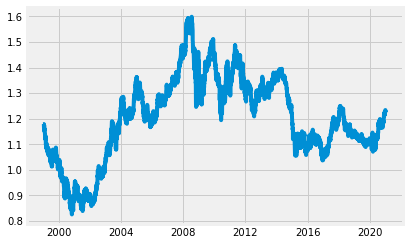

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'] )
plt.show()

In [14]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

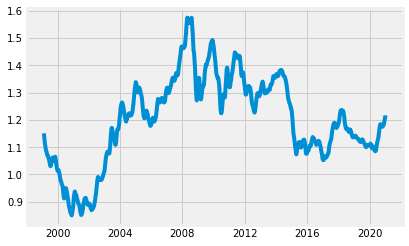

In [15]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'] )
plt.show()

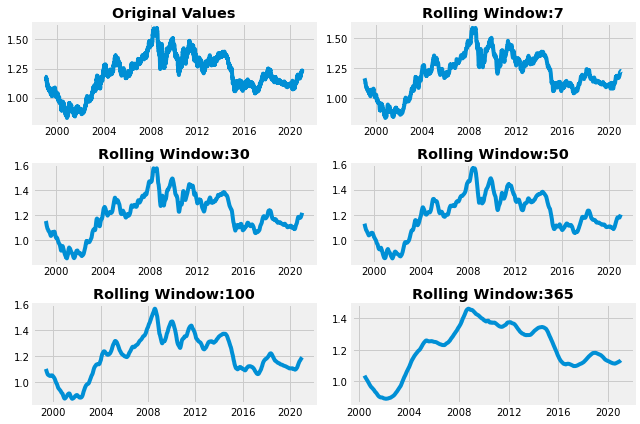

In [16]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title('Original Values',weight='bold')


for i,rolling_mean in zip([2,3,4,5,6],
                         [7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean),weight='bold')
plt.tight_layout()
plt.show()
    

## Coming Up With an Idea

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## Storytelling Data Visualization Examples

### Financial Crisis Example

In [17]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2006)&(euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2007)&(euro_to_dollar['Time'].dt.year <= 2008)]

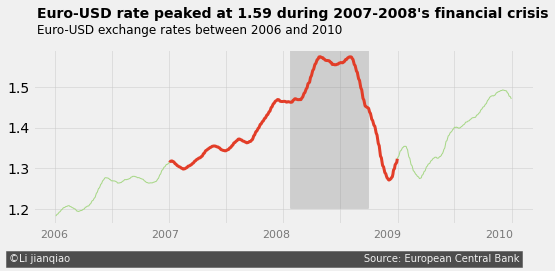

In [71]:
### add the fivethirtyRight style
import matplotlib.style as style
style.use('fivethirtyeight')
### adding the plot 
fig, ax=plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
       financial_crisis['rolling_mean'],
       linewidth=1,color='#A6D785')


## highlight the 2007-2008 period 
ax.plot(financial_crisis_7_8['Time'],
       financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')
## highlight the peak of the crisis
#ax.axvspan(x)
### Highlihting the peak of the crisis
ax.axvspan(xmin=13900.0, xmax=14150.0, ymin=0.09,
           alpha=0.3, color='grey')

    
### Adding separate tick labels
ax.set_xticklabels([])
#ax.set_yticklabels([])



x = 13100
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x,1.13,year,alpha=0.5,fontsize=11)
    x+=356
    


## Adding a title and a subtitle    
ax.text(13090, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13090, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)


# adding a signatrue
ax.text(13000, 1.07, '©Li jianqiao' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
### add soem transpararency to the grid
ax.grid(alpha=0.5)
plt.show()

# The three US presidencies example

In [73]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year>=2001)&(euro_to_dollar['Time'].dt.year<=2021)]
bush = bush_obama_trump.copy()[euro_to_dollar['Time'].dt.year<2009]
obama = bush_obama_trump.copy()[(euro_to_dollar['Time'].dt.year>=2009)&(euro_to_dollar['Time'].dt.year<2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

/tmp/ipykernel_87/473214381.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bush = bush_obama_trump.copy()[euro_to_dollar['Time'].dt.year<2009]
/tmp/ipykernel_87/473214381.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obama = bush_obama_trump.copy()[(euro_to_dollar['Time'].dt.year>=2009)&(euro_to_dollar['Time'].dt.year<2017)]


Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more
flexibility in arranging the subplots:

- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
- We then build only the _bottom_ graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row. 

/tmp/ipykernel_87/1859196254.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'])
/tmp/ipykernel_87/1859196254.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'])
/tmp/ipykernel_87/1859196254.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


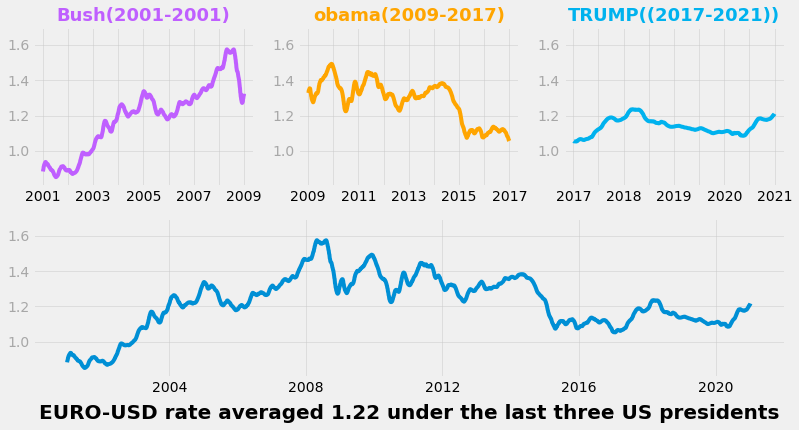

In [108]:
### add the FiveThirtyEight Style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1,ax2,ax3,ax4]

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'],alpha=0.3)
    ax.grid(alpha=0.5)
## ax1:bush
ax1.plot(bush['Time'],bush['rolling_mean'],color='#BF5FFF')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'])
ax1.set_title('Bush(2001-2001)',fontsize=18, weight='bold',
        color='#BF5FFF')
## ax2:obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'])
ax2.set_title('obama(2009-2017)',fontsize=18, weight='bold',
        color='#ffa500')
## ax3:trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'])
ax3.set_title('TRUMP((2017-2021))',fontsize=18, weight='bold',
        color='#00B2EE')

## ax4
ax4.set_title('EURO-USD rate averaged 1.22 under the last three US presidents',y=-0.3,fontsize=20,weight='bold')
ax4.plot(bush_obama_trump['Time'],bush_obama_trump['rolling_mean'])
plt.show()